# Import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('ggplot')
%matplotlib inline

# Data Loading and Exploration

In [8]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [9]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Exercise Habits'] = df['Exercise Habits'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Smoking'] = df['Smoking'].map({'No': 0, 'Yes': 1})
df['Family Heart Disease'] = df['Family Heart Disease'].map({'No': 0, 'Yes': 1})
df['Diabetes'] = df['Diabetes'].map({'No': 0, 'Yes': 1})
df['High Blood Pressure'] = df['High Blood Pressure'].map({'No': 0, 'Yes': 1})
df['Low HDL Cholesterol'] = df['Low HDL Cholesterol'].map({'No': 0, 'Yes': 1})
df['High LDL Cholesterol'] = df['High LDL Cholesterol'].map({'No': 0, 'Yes': 1})
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Stress Level'] = df['Stress Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Sugar Consumption'] = df['Sugar Consumption'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Heart Disease Status'] = df['Heart Disease Status'].map({'No': 0, 'Yes': 1})

# show data after encoding
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1.0,153.0,155.0,2.0,1.0,1.0,0.0,24.991591,1.0,...,0.0,2.0,1.0,7.633228,1.0,342.0,NaN,12.969246,12.387250,0
1,69.0,0.0,146.0,286.0,2.0,0.0,1.0,1.0,25.221799,0.0,...,0.0,1.0,2.0,8.744034,1.0,133.0,157.0,9.355389,19.298875,0
2,46.0,1.0,126.0,216.0,0.0,0.0,0.0,0.0,29.855447,0.0,...,1.0,0.0,0.0,4.440440,0.0,393.0,92.0,12.709873,11.230926,0
3,32.0,0.0,122.0,293.0,2.0,1.0,1.0,0.0,24.130477,1.0,...,1.0,0.0,2.0,5.249405,2.0,293.0,94.0,12.509046,5.961958,0
4,60.0,1.0,166.0,242.0,0.0,1.0,1.0,1.0,20.486289,1.0,...,0.0,0.0,2.0,7.030971,2.0,263.0,154.0,10.381259,8.153887,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0.0,136.0,243.0,1.0,1.0,0.0,0.0,18.788791,1.0,...,1.0,1.0,2.0,6.834954,1.0,343.0,133.0,3.588814,19.132004,1
9996,38.0,1.0,172.0,154.0,1.0,0.0,0.0,0.0,31.856801,1.0,...,1.0,NaN,2.0,8.247784,0.0,377.0,83.0,2.658267,9.715709,1
9997,73.0,1.0,152.0,201.0,2.0,1.0,0.0,1.0,26.899911,0.0,...,1.0,NaN,0.0,4.436762,0.0,248.0,88.0,4.408867,9.492429,1
9998,23.0,1.0,142.0,299.0,0.0,1.0,0.0,1.0,34.964026,1.0,...,1.0,1.0,2.0,8.526329,1.0,113.0,153.0,7.215634,11.873486,1


In [10]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (10000, 21)

First 5 rows:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1.0,153.0,155.0,2.0,1.0,1.0,0.0,24.991591,1.0,...,0.0,2.0,1.0,7.633228,1.0,342.0,NaN,12.969246,12.387250,0
1,69.0,0.0,146.0,286.0,2.0,0.0,1.0,1.0,25.221799,0.0,...,0.0,1.0,2.0,8.744034,1.0,133.0,157.0,9.355389,19.298875,0
2,46.0,1.0,126.0,216.0,0.0,0.0,0.0,0.0,29.855447,0.0,...,1.0,0.0,0.0,4.440440,0.0,393.0,92.0,12.709873,11.230926,0
3,32.0,0.0,122.0,293.0,2.0,1.0,1.0,0.0,24.130477,1.0,...,1.0,0.0,2.0,5.249405,2.0,293.0,94.0,12.509046,5.961958,0
4,60.0,1.0,166.0,242.0,0.0,1.0,1.0,1.0,20.486289,1.0,...,0.0,0.0,2.0,7.030971,2.0,263.0,154.0,10.381259,8.153887,0


In [11]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [12]:
# Dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   float64
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   float64
 5   Smoking               9975 non-null   float64
 6   Family Heart Disease  9979 non-null   float64
 7   Diabetes              9970 non-null   float64
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   float64
 10  Low HDL Cholesterol   9975 non-null   float64
 11  High LDL Cholesterol  9974 non-null   float64
 12  Alcohol Consumption   7414 non-null   float64
 13  Stress Level          9978 non-null   float64
 14  Sleep Hours           9975 non-null   float64
 15  Sugar 

In [13]:
# Statistical summary
df.describe()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
count,9971.000000,9981.000000,9981.000000,9970.000000,9975.000000,9975.000000,9979.000000,9970.000000,9978.000000,9974.000000,...,9974.000000,7414.000000,9978.000000,9975.000000,9970.000000,9974.000000,9978.000000,9974.000000,9980.000000,10000.00000
mean,49.296259,0.501252,149.757740,225.425577,1.010125,0.513584,0.498547,0.496690,29.077269,0.503509,...,0.495087,0.991637,0.995089,6.991329,0.993982,250.734409,120.142213,7.472201,12.456271,0.20000
std,18.193970,0.500023,17.572969,43.575809,0.816045,0.499840,0.500023,0.500014,6.307098,0.500013,...,0.500001,0.814137,0.812770,1.753195,0.821008,87.067226,23.584011,4.340248,4.323426,0.40002
min,18.000000,0.000000,120.000000,150.000000,0.000000,0.000000,0.000000,0.000000,18.002837,0.000000,...,0.000000,0.000000,0.000000,4.000605,0.000000,100.000000,80.000000,0.003647,5.000236,0.00000
25%,34.000000,0.000000,134.000000,187.000000,0.000000,0.000000,0.000000,0.000000,23.658075,0.000000,...,0.000000,0.000000,0.000000,5.449866,0.000000,176.000000,99.000000,3.674126,8.723334,0.00000
50%,49.000000,1.000000,150.000000,226.000000,1.000000,1.000000,0.000000,0.000000,29.079492,1.000000,...,0.000000,1.000000,1.000000,7.003252,1.000000,250.000000,120.000000,7.472164,12.409395,0.00000
75%,65.000000,1.000000,165.000000,263.000000,2.000000,1.000000,1.000000,1.000000,34.520015,1.000000,...,1.000000,2.000000,2.000000,8.531577,2.000000,326.000000,141.000000,11.255592,16.140564,0.00000
max,80.000000,1.000000,180.000000,300.000000,2.000000,1.000000,1.000000,1.000000,39.996954,1.000000,...,1.000000,2.000000,2.000000,9.999952,2.000000,400.000000,160.000000,14.997087,19.999037,1.00000


In [22]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

# Data Visualization

## Countplot

In [23]:
# Check the distribution of the target variable

from matplotlib import rcParams

# set larger figure size (enlarge)
rcParams['figure.figsize'] = 11, 8


### 1. Countplot of Age

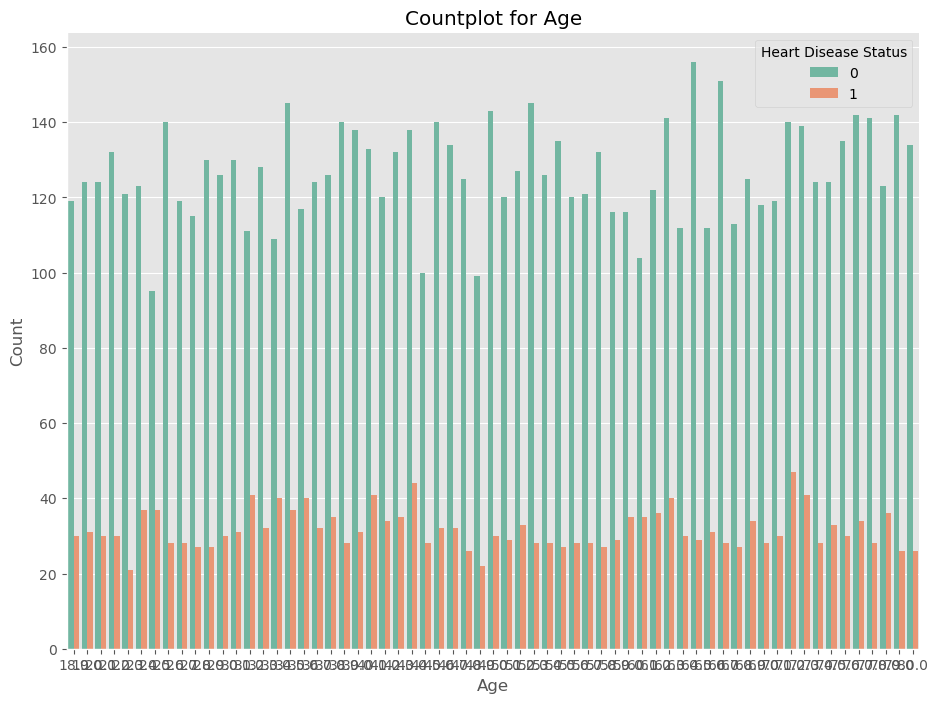

In [24]:

sns.countplot(data = df, x='Age', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()

plt.show()


### 2. Sex 
`0: Female, 1: Male`

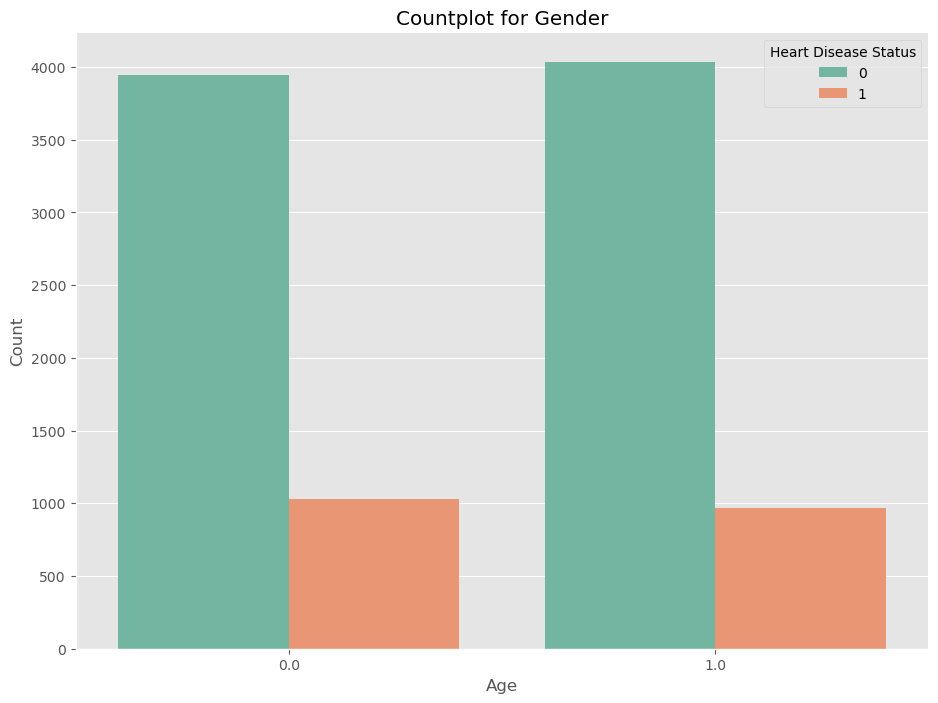

In [47]:

sns.countplot(data = df, x='Gender', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Gender')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()

plt.show()


### 3. Exercise Habits   
`0: Low, 1: Medium, 2: High,`

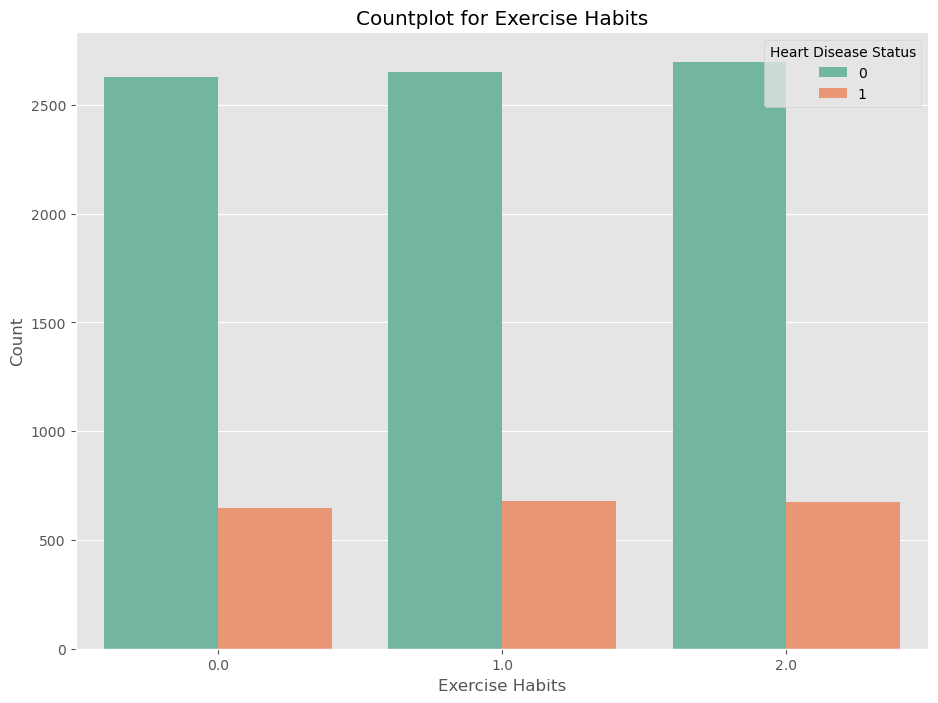

In [45]:
sns.countplot(data = df, x='Exercise Habits', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Exercise Habits')
plt.xlabel('Exercise Habits')
plt.ylabel('Count')
sns.despine()

plt.show()


### 4. Smoking 
`0: No, 1: Yes`

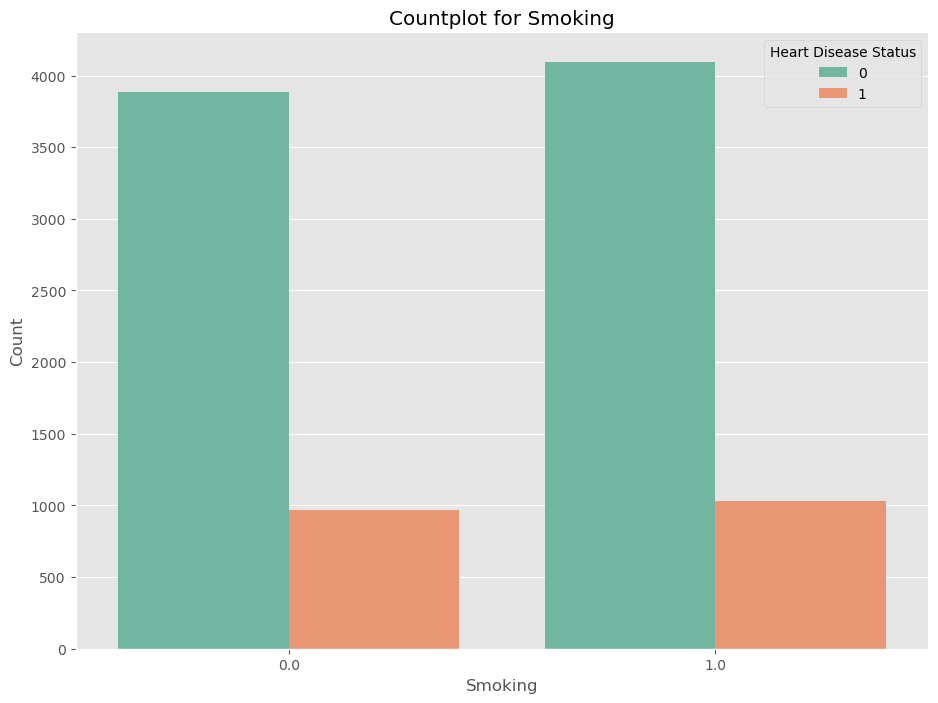

In [28]:
sns.countplot(data = df, x='Smoking', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
sns.despine()

plt.show()


### 5. Family Heart Disease 
`0: No, 1: Yes`

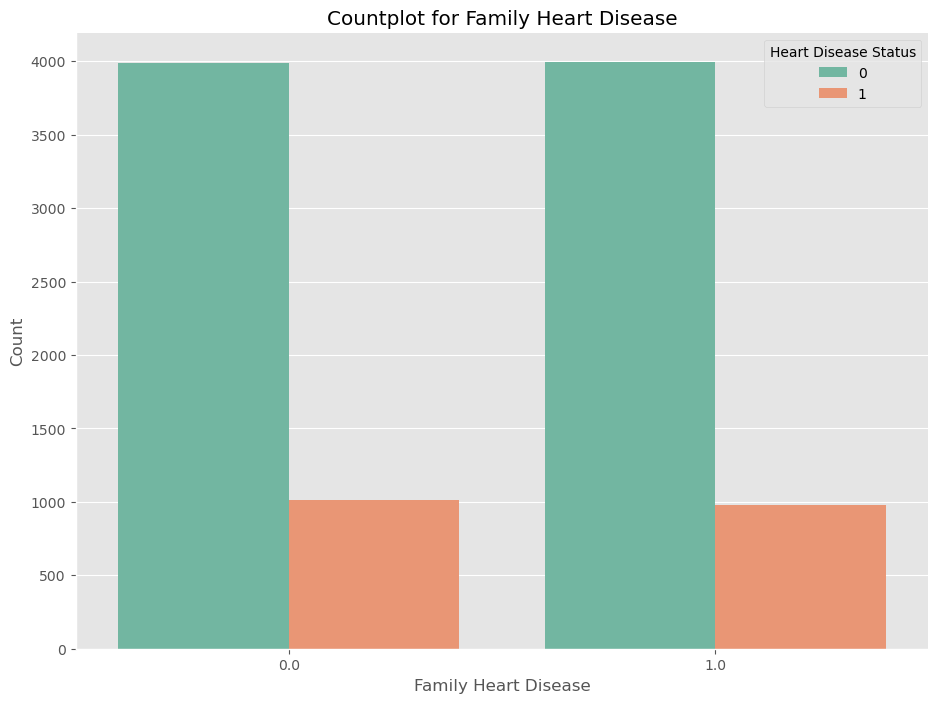

In [29]:
sns.countplot(data = df, x='Family Heart Disease', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Family Heart Disease')
plt.xlabel('Family Heart Disease')
plt.ylabel('Count')
sns.despine()

plt.show()


### 6. Diabetes 
`0: No, 1: Yes`

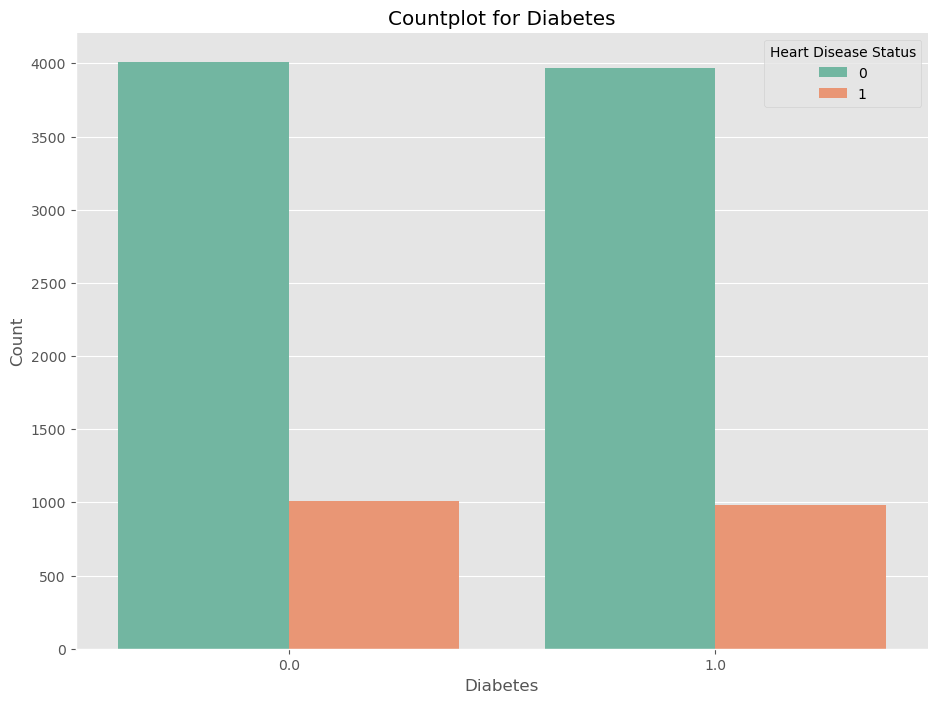

In [30]:
sns.countplot(data = df, x='Diabetes', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
sns.despine()

plt.show()


### 7. High Blood Pressure
`0: No, 1: Yes`

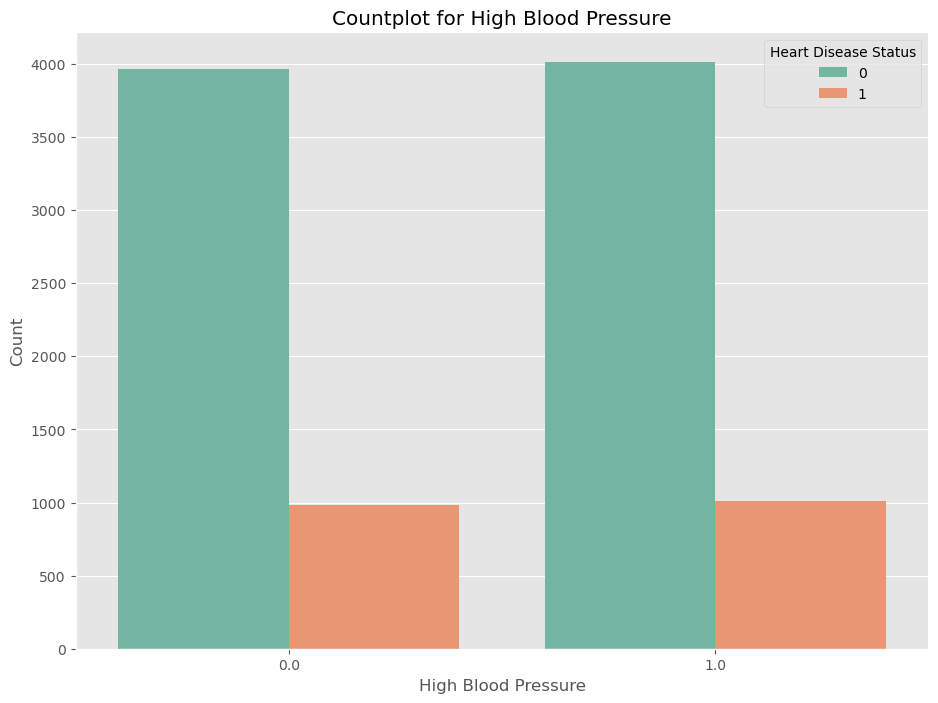

In [31]:
sns.countplot(data = df, x='High Blood Pressure', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
sns.despine()

plt.show()


### 8. High LDL Cholesterol 
`0: No, 1: Yes`

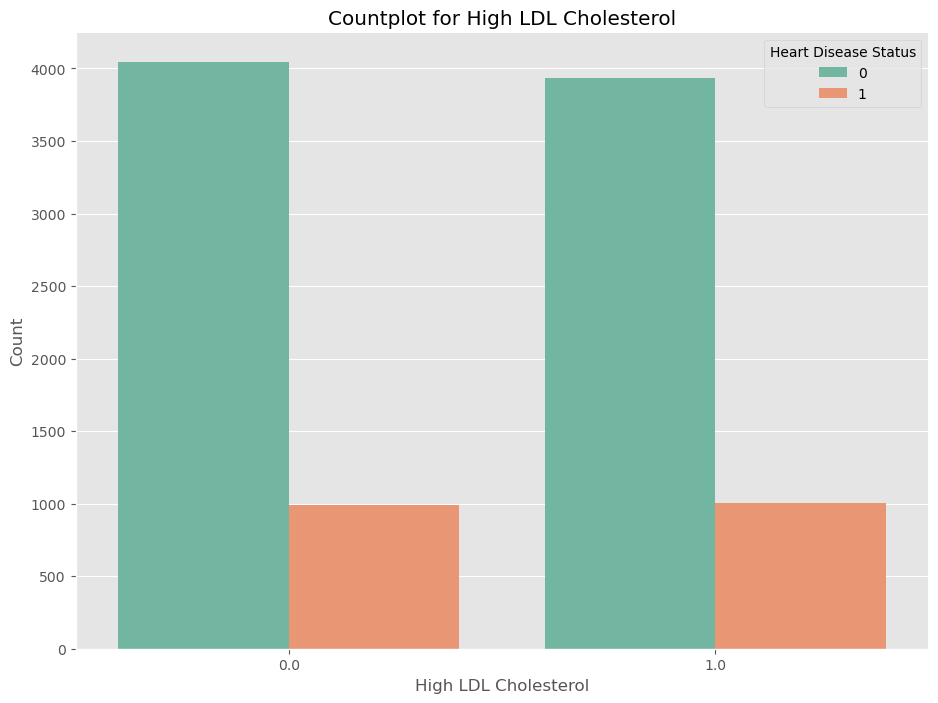

In [33]:
sns.countplot(data = df, x='High LDL Cholesterol', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for High LDL Cholesterol')
plt.xlabel('High LDL Cholesterol')
plt.ylabel('Count')
sns.despine()

plt.show()


### 9. Alcohol Consumption
`0: Low, 1: Medium, 2: High`

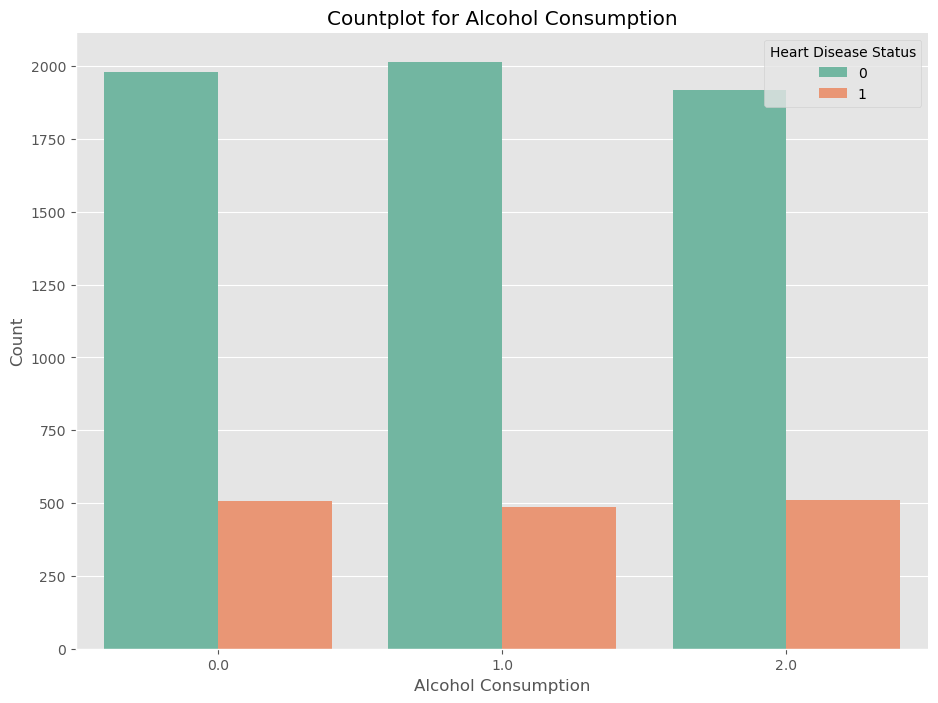

In [34]:
sns.countplot(data = df, x='Alcohol Consumption', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Alcohol Consumption')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
sns.despine()

plt.show()


### 10. Stress Level
`0: Low, 1: Medium, 2: High`

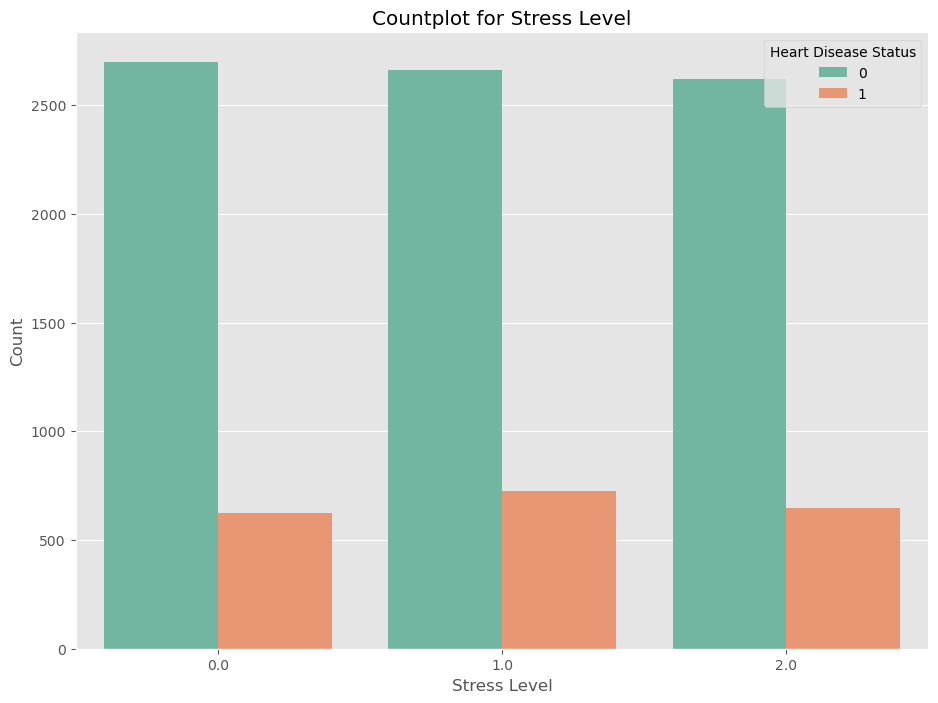

In [35]:
sns.countplot(data = df, x='Stress Level', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
sns.despine()

plt.show()


### 11. Sugar Consumption
`0: Low, 1: Medium, 2: High`

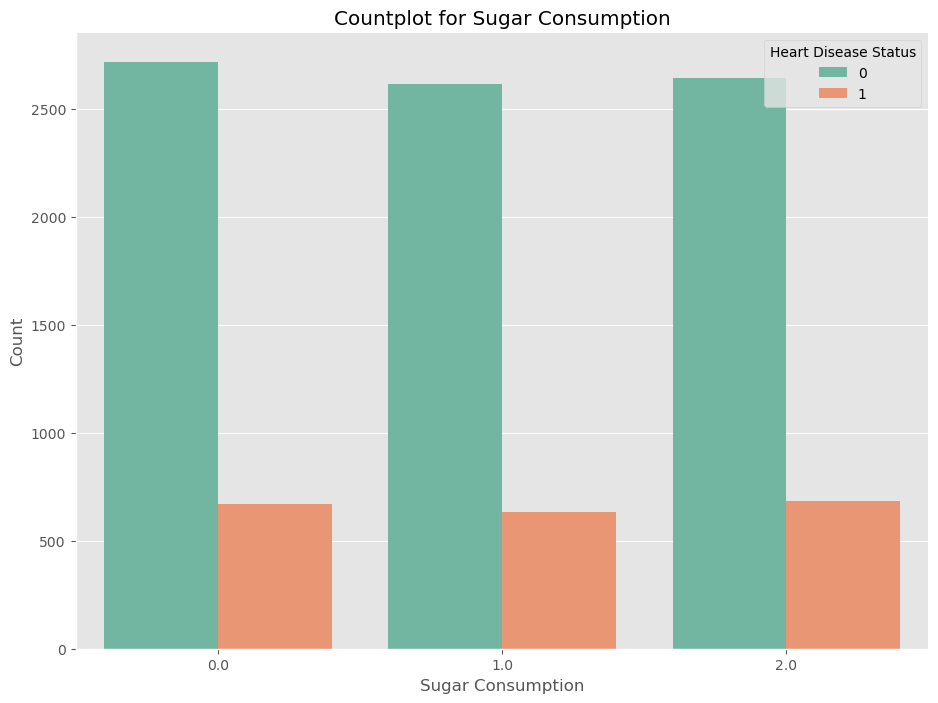

In [36]:
sns.countplot(data = df, x='Sugar Consumption', hue='Heart Disease Status', palette='Set2')

plt.title('Countplot for Sugar Consumption')
plt.xlabel('Sugar Consumption')
plt.ylabel('Count')
sns.despine()

plt.show()
